In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import norm, skew
from scipy.special import boxcox1p
    
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [2]:
df_train2017 = pd.read_csv("/content/drive/MyDrive/oreeva/2017.csv")
df_train2018 = pd.read_csv("/content/drive/MyDrive/oreeva/2018.csv")
df_test = pd.read_csv("/content/drive/MyDrive/oreeva/2019.csv")

In [3]:
print(f'df_train2017 {df_train2017.shape}')
print(f'df_train2018 {df_train2018.shape}')
print(f'df_test {df_test.shape}')

df_train2017 (992212, 43)
df_train2018 (986565, 43)
df_test (28323, 42)


In [4]:
df_train2017.describe()


,price,number_of_rooms,total_floor_area,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_number_open_fireplaces,epc_floor_height,latitude,longitude,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
count,9.922120e+05,488846.000000,550761.000000,550761.000000,550761.000000,550761.000000,550761.000000,46374.000000,490416.000000,308738.000000,981289.000000,981289.000000,970311.000000,981030.000000,929846.000000,907947.000000,9.922120e+05,981289.000000
mean,3.430209e+05,4.607099,91.285681,932.934124,80.054866,718.063476,142.841696,3.207465,0.200783,2.452155,52.340786,-1.353508,311.753490,2371.478555,485.204683,964.415709,9.772327e+07,6.210879
std,2.057961e+06,1.765542,54.153310,4616.730188,40.891643,552.759957,76.631545,2.540377,0.561604,0.640488,1.141627,1.329082,475.290107,2943.331264,432.445959,793.564470,4.938171e+06,7.306605
min,1.000000e+00,1.000000,0.000000,-1323.000000,-8.000000,-65.000000,-31.000000,0.000000,0.000000,0.000000,49.913207,-6.352647,0.532170,0.000000,0.000000,3.000000,8.857598e+07,0.003302
25%,1.400000e+05,3.000000,64.000000,196.000000,55.000000,401.000000,96.000000,2.000000,0.000000,2.330000,51.455900,-2.240896,96.812114,446.000000,243.000000,412.000000,9.336849e+07,1.791768
50%,2.248145e+05,4.000000,81.500000,262.000000,73.000000,606.000000,117.000000,3.000000,0.000000,2.400000,52.143151,-1.387420,161.098046,1430.000000,383.000000,712.000000,9.830963e+07,3.749439
75%,3.500000e+05,5.000000,105.300000,348.000000,96.000000,872.000000,164.000000,4.000000,0.000000,2.500000,53.364162,-0.258715,295.766537,3048.000000,576.000000,1241.000000,1.021145e+08,7.717438
max,7.075042e+08,90.000000,5327.890000,358454.000000,6760.000000,48391.000000,1395.000000,55.000000,50.000000,230.000000,55.797415,1.757928,4784.667983,23074.000000,4695.000000,4838.000000,1.056134e+08,83.744964


In [5]:
df_train2018.describe()

,price,number_of_rooms,total_floor_area,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_number_open_fireplaces,epc_floor_height,latitude,longitude,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
count,9.865650e+05,361287.000000,409595.000000,409595.000000,409595.000000,409595.000000,409595.000000,39583.000000,362585.000000,216794.000000,906888.000000,906888.000000,896594.000000,906668.000000,857402.000000,838429.000000,9.865650e+05,906888.000000
mean,3.453821e+05,4.506971,88.307018,1049.659930,77.419304,679.006654,138.278373,3.123765,0.201081,2.454311,52.365887,-1.379345,310.677958,2339.645078,481.820775,963.748329,9.940130e+07,6.168990
std,1.818853e+06,1.680315,51.231621,4979.396762,40.717142,521.660996,73.737421,2.412517,0.586876,0.552198,1.146690,1.325793,476.008688,2864.454167,431.092765,791.441957,5.677736e+06,7.203666
min,1.000000e+00,1.000000,0.000000,-229.000000,-1.000000,-801.000000,-1.000000,0.000000,0.000000,0.000000,49.913412,-6.318531,0.915098,0.000000,0.000000,5.000000,8.857593e+07,0.003302
25%,1.460000e+05,3.000000,63.000000,195.000000,54.000000,385.000000,94.000000,2.000000,0.000000,2.320000,51.460335,-2.254189,96.677427,453.000000,241.000000,413.000000,9.431985e+07,1.802819
50%,2.300000e+05,4.000000,80.000000,262.000000,71.000000,578.000000,114.000000,3.000000,0.000000,2.400000,52.223907,-1.420463,160.018906,1436.000000,380.000000,713.000000,1.003003e+08,3.759811
75%,3.550000e+05,5.000000,102.000000,350.000000,92.000000,825.000000,157.000000,4.000000,0.000000,2.520000,53.381303,-0.291268,292.025261,3031.000000,572.000000,1241.000000,1.053053e+08,7.691601
max,5.692000e+08,91.000000,3571.440000,416354.000000,5505.000000,62707.000000,1411.000000,63.000000,75.000000,204.000000,55.797415,1.758397,4815.169126,23074.000000,4743.000000,4786.000000,1.056136e+08,83.567883


In [6]:
df_train = pd.concat([df_train2017,df_train2018])
len_train = len(df_train)
len_train

1978777

In [7]:
def check_df_concat(df1,df2,df_concat):
  if (df1.shape[0] + df2.shape[0]) == df_concat.shape[0]:
    return f"Correctly Joined. Shape : {df_concat.shape}" 
  return "Error"

In [8]:
check_df_concat(df_train2017,df_train2018,df_train)

'Correctly Joined. Shape : (1978777, 43)'

#Data Lookup

####Train Dataset

In [9]:
df_train.head()

,transaction_id,created,duration,price,old_new,ppd_category,property_type,flat,floor_level,number_of_rooms,total_floor_area,epc_current_energy_rating,epc_potential_energy_rating,epc_property_type,epc_built_form,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_glazed_area,epc_number_open_fireplaces,epc_windows_description,epc_windows_energy_eff,epc_walls_description,epc_walls_energy_eff,epc_roof_description,epc_roof_energy_eff,epc_floor_height,postcode,city,street,building_name,building_number,latitude,longitude,postcode_sector,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
0,{5CF9903C-EF46-7F13-E053-6C04A8C074B1},2017-06-22,F,86787,Y,B,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NG19 8RX,MANSFIELD,PICCADILLY CLOSE,NaN,24,53.177751,-1.191828,NG19 8,130.419369,741.0,735.0,674.0,102877980,3.658300
1,{5F54B81D-F9BF-2B45-E053-6B04A8C01FB0},2017-10-13,F,805000,N,A,D,NaN,NaN,9.0,173.04,E,D,House,Detached,297.0,189.0,1489.0,259.0,NaN,Normal,0.0,Partial double glazing,Average,"Cavity wall, as built, insulated (assumed)",Good,"Pitched, insulated (assumed)",Average,2.7,SN8 3LP,WILTSHIRE,FOREST HILL,NaN,3,51.380891,-1.605473,SN8 3,446.805795,10.0,633.0,NaN,97804281,27.205352
2,{4C4EE000-1146-1854-E050-A8C063054F34},2017-03-08,F,275000,N,A,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DY5 3XJ,DUDLEY,PATTERDALE WAY,NaN,36,52.469943,-2.134401,DY5 3,310.743404,1576.0,845.0,745.0,101429204,5.659612
3,{5F54B81D-EAA3-2B45-E053-6B04A8C01FB0},2017-10-27,L,220000,N,A,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B93 8SP,SOLIHULL,KINGSLAND DRIVE,NaN,63,52.377534,-1.762286,B93 8,265.388640,184.0,817.0,686.0,100150188,4.190032
4,{5CF9903C-2479-7F13-E053-6C04A8C074B1},2017-05-05,F,237000,N,A,D,NaN,NaN,NaN,105.00,B,A,House,Detached,95.0,67.0,320.0,87.0,NaN,NaN,NaN,High performance glazing,Very Good,Average thermal transmittance 0.24 W/m²K,Very Good,Average thermal transmittance 0.14 W/m²K,Very Good,NaN,LE10 2PG,BLABY,RUBY CLOSE,NaN,1,52.531956,-1.376669,LE10 2,236.354546,643.0,582.0,761.0,93361793,14.267637


In [10]:
print("Len train set: ",len(df_train))
print("Shape of train set: ", df_train.shape)

Len train set:  1978777
Shape of train set:  (1978777, 43)


In [11]:
df_train.describe()

,price,number_of_rooms,total_floor_area,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_number_open_fireplaces,epc_floor_height,latitude,longitude,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
count,1.978777e+06,850133.000000,960356.000000,960356.000000,960356.000000,960356.000000,960356.000000,85957.000000,853001.000000,525532.000000,1.888177e+06,1.888177e+06,1.866905e+06,1.887698e+06,1.787248e+06,1.746376e+06,1.978777e+06,1.888177e+06
mean,3.441981e+05,4.564547,90.015271,982.718065,78.930790,701.405613,140.895424,3.168922,0.200909,2.453044,5.235284e+01,-1.365917e+00,3.112370e+02,2.356189e+03,4.835813e+02,9.640953e+02,9.855989e+07,6.190759e+00
std,1.942431e+06,1.730543,52.947399,4775.125172,40.838095,540.060623,75.444502,2.482652,0.572482,0.605628,1.144130e+00,1.327566e+00,4.756355e+02,2.905756e+03,4.318005e+02,7.925460e+02,5.385521e+06,7.257374e+00
min,1.000000e+00,1.000000,0.000000,-1323.000000,-8.000000,-801.000000,-31.000000,0.000000,0.000000,0.000000,4.991321e+01,-6.352647e+00,5.321700e-01,0.000000e+00,0.000000e+00,3.000000e+00,8.857593e+07,3.301802e-03
25%,1.440000e+05,3.000000,64.000000,196.000000,54.000000,394.000000,95.000000,2.000000,0.000000,2.330000,5.145793e+01,-2.247356e+00,9.674732e+01,4.490000e+02,2.420000e+02,4.120000e+02,9.381703e+07,1.796913e+00
50%,2.265000e+05,4.000000,81.000000,262.000000,72.000000,594.000000,116.000000,3.000000,0.000000,2.400000,5.219065e+01,-1.402552e+00,1.605978e+02,1.433000e+03,3.820000e+02,7.120000e+02,9.918091e+07,3.754652e+00
75%,3.520000e+05,5.000000,104.000000,349.000000,95.000000,852.000000,161.000000,4.000000,0.000000,2.510000,5.337324e+01,-2.731810e-01,2.938576e+02,3.040000e+03,5.740000e+02,1.241000e+03,1.036150e+08,7.704068e+00
max,7.075042e+08,91.000000,5327.890000,416354.000000,6760.000000,62707.000000,1411.000000,63.000000,75.000000,230.000000,5.579742e+01,1.758397e+00,4.815169e+03,2.307400e+04,4.743000e+03,4.838000e+03,1.056136e+08,8.374496e+01


####Test Dataset

In [12]:
df_test.describe()


,number_of_rooms,total_floor_area,epc_energy_consumption_current,epc_lighting_cost_current,epc_heating_cost_current,epc_hot_water_cost_current,epc_flat_storey_count,epc_number_open_fireplaces,epc_floor_height,latitude,longitude,closeststop,crimesin3km_antisocial,closestschool,closestpark,address_id,distance_center
count,25775.000000,28323.000000,28323.000000,28323.000000,28323.000000,28323.000000,2606.000000,25850.000000,15239.000000,28321.000000,28321.000000,28052.000000,28320.000000,26890.000000,26364.000000,2.832300e+04,28321.000000
mean,4.482211,89.842777,1059.175123,77.230160,672.075178,137.459270,2.988872,0.211141,2.450256,52.344054,-1.378285,297.752091,2250.969880,464.329900,948.511569,9.418641e+07,6.097563
std,1.580803,58.958723,4812.350197,59.975968,452.811068,71.059309,2.073938,0.557207,0.273533,1.145298,1.335869,454.904724,2665.934581,400.751073,773.612523,3.329168e+06,7.058303
min,1.000000,1.240000,-30.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,49.987482,-5.691800,2.286049,0.000000,0.000000,13.000000,8.857593e+07,0.028571
25%,3.000000,65.000000,197.000000,54.000000,395.000000,94.000000,2.000000,0.000000,2.330000,51.444818,-2.248804,97.357629,474.000000,240.000000,408.000000,9.122862e+07,1.777685
50%,4.000000,81.000000,262.000000,71.000000,583.000000,114.000000,3.000000,0.000000,2.400000,52.201565,-1.415831,157.941862,1428.000000,375.000000,706.000000,9.411824e+07,3.732491
75%,5.000000,102.000000,348.000000,92.000000,818.000000,156.000000,4.000000,0.000000,2.520000,53.372771,-0.295174,281.528629,2939.250000,558.000000,1217.000000,9.710424e+07,7.662969
max,40.000000,6886.100000,182162.000000,8253.000000,9140.000000,961.000000,28.000000,11.000000,20.000000,55.777929,1.754483,4757.317580,21896.000000,4593.000000,4798.000000,9.999101e+07,80.603386


#Correlation of features with target variable.

In [13]:
df_train.columns.sort_values()

Index(['address_id', 'building_name', 'building_number', 'city', 'closestpark',
       'closestschool', 'closeststop', 'created', 'crimesin3km_antisocial',
       'distance_center', 'duration', 'epc_built_form',
       'epc_current_energy_rating', 'epc_energy_consumption_current',
       'epc_flat_storey_count', 'epc_floor_height', 'epc_glazed_area',
       'epc_heating_cost_current', 'epc_hot_water_cost_current',
       'epc_lighting_cost_current', 'epc_number_open_fireplaces',
       'epc_potential_energy_rating', 'epc_property_type',
       'epc_roof_description', 'epc_roof_energy_eff', 'epc_walls_description',
       'epc_walls_energy_eff', 'epc_windows_description',
       'epc_windows_energy_eff', 'flat', 'floor_level', 'latitude',
       'longitude', 'number_of_rooms', 'old_new', 'postcode',
       'postcode_sector', 'ppd_category', 'price', 'property_type', 'street',
       'total_floor_area', 'transaction_id'],
      dtype='object')

In [14]:
# df_train.corr()
co = pd.DataFrame((df_train.corr())['price'].sort_values(ascending=False))
print(co)


                                   price
price                           1.000000
total_floor_area                0.118270
epc_lighting_cost_current       0.093115
number_of_rooms                 0.085685
epc_heating_cost_current        0.077295
crimesin3km_antisocial          0.075663
epc_flat_storey_count           0.065098
epc_number_open_fireplaces      0.046245
longitude                       0.042186
address_id                      0.026956
epc_floor_height                0.021534
epc_hot_water_cost_current      0.019407
closestschool                   0.013722
epc_energy_consumption_current  0.009113
closeststop                    -0.001349
closestpark                    -0.007773
distance_center                -0.016440
latitude                       -0.049843


Result shows that the total_floor_area, epc ratings, and as expected the rooms have strong relation with price. 
Negative values shows the inverse realtion with price. (Property which are near to city center are tends to be more expensive. 

In [15]:
# df_train.corr()
cor = (df_train.corr()**2)['price'].sort_values(ascending=False)
print(cor)

price                             1.000000
total_floor_area                  0.013988
epc_lighting_cost_current         0.008670
number_of_rooms                   0.007342
epc_heating_cost_current          0.005975
crimesin3km_antisocial            0.005725
epc_flat_storey_count             0.004238
latitude                          0.002484
epc_number_open_fireplaces        0.002139
longitude                         0.001780
address_id                        0.000727
epc_floor_height                  0.000464
epc_hot_water_cost_current        0.000377
distance_center                   0.000270
closestschool                     0.000188
epc_energy_consumption_current    0.000083
closestpark                       0.000060
closeststop                       0.000002
Name: price, dtype: float64


In [16]:
cities = pd.DataFrame(df_train['city'].value_counts())
print(len(cities))
cities.head(5)

350


,city
BIRMINGHAM,29598
LEEDS,27379
CORNWALL,23777
COUNTY-DURHAM,19268
CHESHIRE-EAST,17943


In [17]:
df_train.total_floor_area.value_counts()

0.0000      24354
84.0000      9362
80.0000      9160
78.0000      9067
70.0000      8947
            ...  
79.3150         1
123.3091        1
76.7870         1
43.2920         1
178.0400        1
Name: total_floor_area, Length: 33855, dtype: int64

Latitude and Longitude are the loc of property.

#Missing Values 


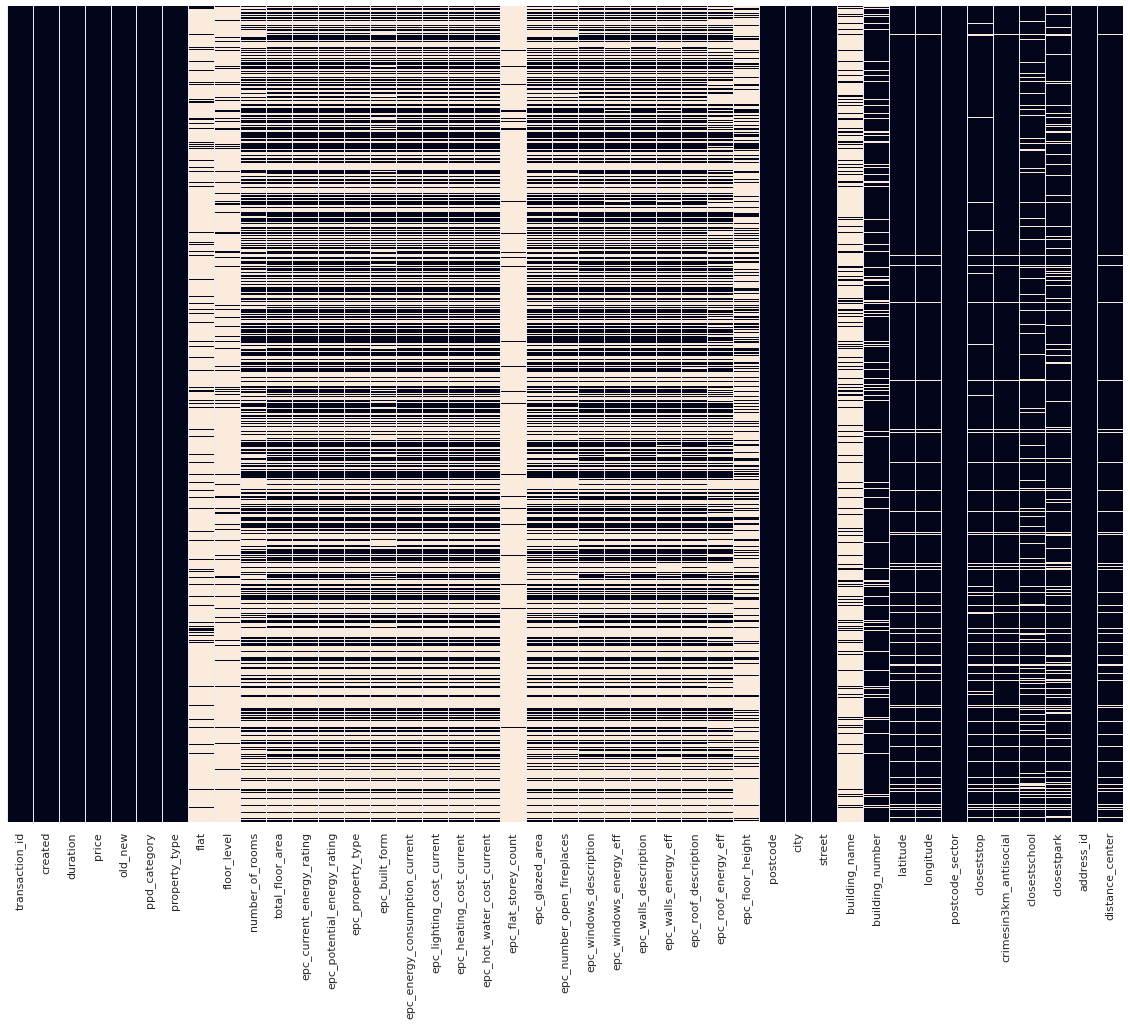

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.isna(),yticklabels=False,cbar=False)


A very informative plot, here we can see which columns/features have null/nan values in training dataset. 

**White strips shows the presence of null/nan values.**


In [19]:
# df_train['epc_energy_consumption_current'].isna().sum()
#Filtering out the features which have nan values

# df_train_missing_data = pd.DataFrame(df_train.isna().sum().sort_values(ascending=False), columns=['#Missing_Values'])
# df_train_missing_data = df_train_missing_data[df_train_missing_data['#Missing_Values'] > 0]
# df_train_missing_data

In [20]:
# energy_fea=['epc_built_form',
#        'epc_current_energy_rating', 'epc_energy_consumption_current',
#        'epc_flat_storey_count', 'epc_floor_height', 'epc_glazed_area',
#        'epc_heating_cost_current', 'epc_hot_water_cost_current',
#        'epc_lighting_cost_current', 'epc_number_open_fireplaces',
#        'epc_potential_energy_rating', 'epc_property_type',
#        'epc_roof_description', 'epc_roof_energy_eff', 'epc_walls_description',
#        'epc_walls_energy_eff', 'epc_windows_description',
#        'epc_windows_energy_eff']

##Splitting Categorical and Numerical Features

In [21]:
continuous = []
categorical = []

for i in df_train.columns:
    if df_train[i].dtype == "object":
        categorical.append(i)
    else: continuous.append(i)

print("Continuous:", continuous)
print("-")
print("Categorical:", categorical)

Continuous: ['price', 'number_of_rooms', 'total_floor_area', 'epc_energy_consumption_current', 'epc_lighting_cost_current', 'epc_heating_cost_current', 'epc_hot_water_cost_current', 'epc_flat_storey_count', 'epc_number_open_fireplaces', 'epc_floor_height', 'latitude', 'longitude', 'closeststop', 'crimesin3km_antisocial', 'closestschool', 'closestpark', 'address_id', 'distance_center']
-
Categorical: ['transaction_id', 'created', 'duration', 'old_new', 'ppd_category', 'property_type', 'flat', 'floor_level', 'epc_current_energy_rating', 'epc_potential_energy_rating', 'epc_property_type', 'epc_built_form', 'epc_glazed_area', 'epc_windows_description', 'epc_windows_energy_eff', 'epc_walls_description', 'epc_walls_energy_eff', 'epc_roof_description', 'epc_roof_energy_eff', 'postcode', 'city', 'street', 'building_name', 'building_number', 'postcode_sector']


####Categorical

In [22]:
isna_sum = df_train[categorical].isna().sum()
NaN_columns = [i for i in isna_sum.index if df_train[i].isna().sum() !=0]
df_NaN_values = df_train[NaN_columns]
missing_categorical = pd.DataFrame(df_NaN_values.isna().sum(), columns = ["Missing values"])
missing_categorical.sort_values(["Missing values"], axis = 0, ascending = False)

,Missing values
flat,1789035
floor_level,1781232
building_name,1682501
epc_roof_energy_eff,1141996
epc_glazed_area,1128643
epc_built_form,1065392
epc_walls_energy_eff,1031382
epc_windows_energy_eff,1026231
epc_roof_description,1018815
epc_walls_description,1018476


In [23]:
print(df_train.street.mode()[0])
print(df_train.city.mode()[0])


HIGH STREET
BIRMINGHAM


In [24]:
df_m1_train = df_train.copy()

In [25]:
# p'flat',
# 'floor_level',
# 'building_name',
# 'epc_roof_energy_eff',
# 'epc_glazed_area',
# 'epc_built_form',
# 'epc_walls_energy_eff',
# 'epc_windows_energy_eff',
# 'epc_roof_description',
# 'epc_walls_description',
# 'epc_windows_description',
# 'epc_property_type',
# 'epc_potential_energy_rating',
# 'epc_current_energy_rating',
# 'building_number','city','street']

In [26]:
for i in ['flat','floor_level','building_name','epc_roof_energy_eff',
          'epc_glazed_area','epc_built_form','epc_walls_energy_eff',
          'epc_windows_energy_eff','epc_roof_description',
          'epc_walls_description','epc_windows_description','epc_property_type',
          'epc_potential_energy_rating','epc_current_energy_rating',
          'building_number',]:
          df_m1_train[i].fillna("NA", inplace = True)

In [27]:
for i in ['city','street']:
  df_m1_train[i].fillna(df_m1_train[i].mode()[0], inplace = True)

In [28]:
df_m1_train[categorical].isna().sum()

transaction_id                 0
created                        0
duration                       0
old_new                        0
ppd_category                   0
property_type                  0
flat                           0
floor_level                    0
epc_current_energy_rating      0
epc_potential_energy_rating    0
epc_property_type              0
epc_built_form                 0
epc_glazed_area                0
epc_windows_description        0
epc_windows_energy_eff         0
epc_walls_description          0
epc_walls_energy_eff           0
epc_roof_description           0
epc_roof_energy_eff            0
postcode                       0
city                           0
street                         0
building_name                  0
building_number                0
postcode_sector                0
dtype: int64

####Numerical

In [29]:
isna_sum = df_train[continuous].isna().sum()
NaN_columns = [i for i in isna_sum.index if df_train[i].isna().sum() !=0]
df_NaN_values = df_train[NaN_columns]
missing_continuous = pd.DataFrame(df_NaN_values.isna().sum(), columns = ["Missing values"])
missing_continuous.sort_values(["Missing values"], axis = 0, ascending = False)



,Missing values
epc_flat_storey_count,1892820
epc_floor_height,1453245
number_of_rooms,1128644
epc_number_open_fireplaces,1125776
total_floor_area,1018421
epc_energy_consumption_current,1018421
epc_lighting_cost_current,1018421
epc_heating_cost_current,1018421
epc_hot_water_cost_current,1018421
closestpark,232401


In [30]:
for i in ( ['epc_flat_storey_count', 
          'epc_number_open_fireplaces', 'epc_floor_height', 
          'latitude', 'longitude']):
  df_m1_train[i].fillna(0, inplace = True)


for j in  (['epc_energy_consumption_current', 'epc_lighting_cost_current',
  'epc_heating_cost_current','epc_hot_water_cost_current']):
  df_m1_train[j].fillna(-1, inplace = True)

In [31]:
for i in (['number_of_rooms', 'total_floor_area','closeststop', 'crimesin3km_antisocial', 
          'closestschool', 'closestpark', 'distance_center']):
          df_m1_train[i].fillna(df_m1_train[i].median(),inplace = True)

In [32]:
df_m1_train[continuous].isna().sum()

price                             0
number_of_rooms                   0
total_floor_area                  0
epc_energy_consumption_current    0
epc_lighting_cost_current         0
epc_heating_cost_current          0
epc_hot_water_cost_current        0
epc_flat_storey_count             0
epc_number_open_fireplaces        0
epc_floor_height                  0
latitude                          0
longitude                         0
closeststop                       0
crimesin3km_antisocial            0
closestschool                     0
closestpark                       0
address_id                        0
distance_center                   0
dtype: int64

###Analysis

In [33]:
df_m1_train.shape

(1978777, 43)

In [34]:

big_skew = [feature for feature in continuous if abs(df_m1_train[feature].skew()) > 0.75]

In [35]:
big_skew

['price',
 'number_of_rooms',
 'total_floor_area',
 'epc_energy_consumption_current',
 'epc_lighting_cost_current',
 'epc_heating_cost_current',
 'epc_hot_water_cost_current',
 'epc_flat_storey_count',
 'epc_number_open_fireplaces',
 'epc_floor_height',
 'latitude',
 'closeststop',
 'crimesin3km_antisocial',
 'closestschool',
 'closestpark',
 'distance_center']

In [36]:
for feature in big_skew:
    df_m1_train[feature] = boxcox1p(df_m1_train[feature], 0.15)


In [37]:
print("Skew:", round(df_m1_train['price'].skew(),2))

Skew: 1.16


In [38]:
df_m1_train.columns

Index(['transaction_id', 'created', 'duration', 'price', 'old_new',
       'ppd_category', 'property_type', 'flat', 'floor_level',
       'number_of_rooms', 'total_floor_area', 'epc_current_energy_rating',
       'epc_potential_energy_rating', 'epc_property_type', 'epc_built_form',
       'epc_energy_consumption_current', 'epc_lighting_cost_current',
       'epc_heating_cost_current', 'epc_hot_water_cost_current',
       'epc_flat_storey_count', 'epc_glazed_area',
       'epc_number_open_fireplaces', 'epc_windows_description',
       'epc_windows_energy_eff', 'epc_walls_description',
       'epc_walls_energy_eff', 'epc_roof_description', 'epc_roof_energy_eff',
       'epc_floor_height', 'postcode', 'city', 'street', 'building_name',
       'building_number', 'latitude', 'longitude', 'postcode_sector',
       'closeststop', 'crimesin3km_antisocial', 'closestschool', 'closestpark',
       'address_id', 'distance_center'],
      dtype='object')

In [39]:
len(df_m1_train.created.unique())

728